In [39]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import *
from qiskit.quantum_info import random_statevector, Statevector
import numpy as np


In [40]:
# Built a Quantum Circuit with 2 Qubit lines few Hadamard and CNOt gates
qr = QuantumRegister(2, 'qreg')
qc_circ = QuantumCircuit(qr)
qc_circ.h(0)
qc_circ.cx(0, 1)
qc_circ.z(1)
qc_circ.draw()


┌───┐          
qreg_0: ┤ H ├──■───────
        └───┘┌─┴─┐┌───┐
qreg_1: ─────┤ X ├┤ Z ├
             └───┘└───┘

In [53]:
#Defining Unitary Simulator as bkend needed for Unitary Matrix 
bkend_unitary = Aer.get_backend('unitary_simulator') 
#Executes Job with qc Circuit and Unitary Simulator as bkend
result = execute(qc_circ, bkend_unitary).result() 
unitary_matrix = result.get_unitary() # gets unitary matrix with Result from Job done above
print(unitary_matrix.round(2))

[[ 0.71+0.j  0.71-0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.71+0.j -0.71+0.j]
 [-0.  +0.j -0.  +0.j -0.71+0.j -0.71+0.j]
 [-0.71+0.j  0.71-0.j -0.  +0.j -0.  +0.j]]


<ipython-input-53-8be199fd4179>:6: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(unitary_matrix.round(2))


Statevector([ 0.71+0.j,  0.  +0.j, -0.  +0.j, -0.71+0.j],
            dims=(2, 2))


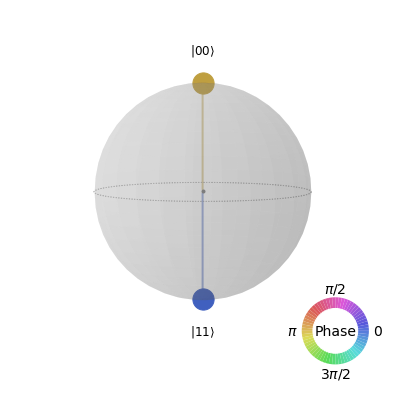

In [60]:
# Defining Statevector Simulator as bkend needed for Getting statevector
sv_backend = Aer.get_backend('statevector_simulator') 
# Executes job to get the Statevector at the end of this circuit
sv_circ = execute(qc_circ, sv_backend).result().get_statevector(0,2) 
print(sv_circ) 
plot_state_qsphere(sv_circ)


In [57]:
# let convert this matrix in the operator and see if we get the
# same outcome when we use statevector simulator to obtain quantum
# state at the end of circuit.
# Built a Quantum Circuit with 2 Qubit lines few Hadamard and CNOt gates
qr = QuantumRegister(2, 'qreg')
qc_U = QuantumCircuit(qr)
qc_U.append(unitary_matrix, [0,1])
qc_U.draw()



┌──────────┐
qreg_0: ┤0         ├
        │  Unitary │
qreg_1: ┤1         ├
        └──────────┘

Statevector([ 0.71+0.j,  0.  +0.j,  0.  +0.j, -0.71+0.j],
            dims=(2, 2))


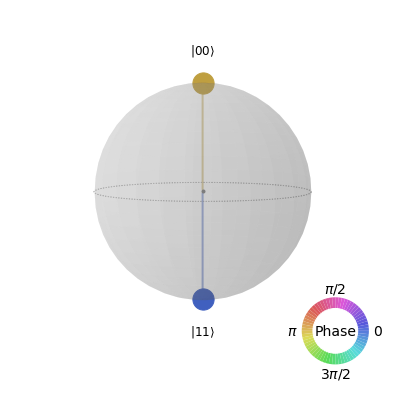

In [59]:
# seelct Statevector Simulator as bkend needed for Getting statevector
sv_backend = Aer.get_backend('statevector_simulator') 
sv_unitary = execute(qc_U, sv_backend).result().get_statevector(0,2) #Executes Job with qc Circuit and Statevector Simulator as bkend and gets job result
print(sv_unitary) 
plot_state_qsphere(sv_unitary)


In [61]:
#end of program 